In [93]:
import open3d as o3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[[890.1248  890.1248  890.1248  ... 890.1248  890.1248  890.1248 ]
 [892.60785 892.60785 892.60785 ... 892.60785 892.60785 892.60785]
 [895.1046  895.1046  895.1046  ... 895.1046  895.1046  895.1046 ]
 ...
 [895.1048  895.1048  895.1048  ... 895.1048  895.1048  895.1048 ]
 [892.60803 892.60803 892.60803 ... 892.60803 892.60803 892.60803]
 [890.12494 890.12494 890.12494 ... 890.12494 890.12494 890.12494]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[3025 3025 3025 ... 2762 2762 2762]
 [3025 3025 3025 ... 2762 2762 2762]
 [3025 3025 3025 ... 2762 2762 2762]
 ...
 [2250 2250 2250 ... 2513 2513 2513]
 [2250 2250 2250 ... 2513 2513 2513]
 [2250 2250 2250 ... 2513 2513 2513]]
1902


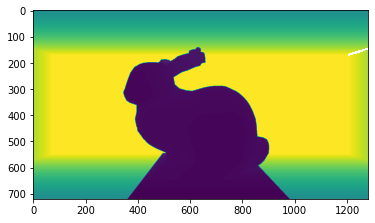

In [96]:
mesh = o3d.io.read_triangle_mesh('bunny_mesh_merge.OBJ')
# print(mesh)
# print(np.asarray(mesh.vertices))
# print(np.asarray(mesh.triangles))
# print(type(mesh))
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(mesh)

rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, 500, 0],
    eye=[0, 500, 200],
    up=[0, -1, 0],
    width_px=1280,
    height_px=720,
)

ans = scene.cast_rays(rays)
plt.imshow(ans['t_hit'].numpy())
print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
df = pd.DataFrame(ans['primitive_ids'].numpy())
df.to_csv('./test.csv')

ans_unique = np.unique(ans['primitive_ids'].numpy())
print(ans_unique.shape[0])



[[890.1248  890.1248  890.1248  ... 890.1248  890.1248  890.1248 ]
 [892.60785 892.60785 892.60785 ... 892.60785 892.60785 892.60785]
 [895.1046  895.1046  895.1046  ... 895.1046  895.1046  895.1046 ]
 ...
 [895.1047  895.1047  895.1047  ... 895.1047  895.1047  895.1047 ]
 [892.608   892.608   892.608   ... 892.608   892.608   892.608  ]
 [890.1248  890.1248  890.1248  ... 890.1248  890.1248  890.1248 ]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[2895 2895 2895 ... 2954 2954 2954]
 [2895 2895 2895 ... 2954 2954 2954]
 [2895 2895 2895 ... 2954 2954 2954]
 ...
 [2442 2442 2442 ... 2383 2383 2383]
 [2442 2442 2442 ... 2383 2383 2383]
 [2442 2442 2442 ... 2383 2383 2383]]
2608


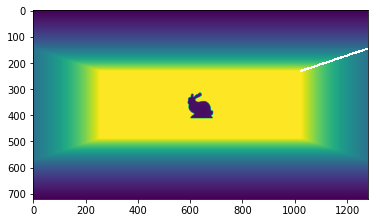

In [97]:
mesh = o3d.io.read_triangle_mesh('bunny_mesh_merge.OBJ')
# print(mesh)
# print(np.asarray(mesh.vertices))
# print(np.asarray(mesh.triangles))
# print(type(mesh))
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(mesh)

rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, 500, 0],
    eye=[0, 500, 1000],
    up=[0, -1, 0],
    width_px=1280,
    height_px=720,
)

ans = scene.cast_rays(rays)
plt.imshow(ans['t_hit'].numpy())
print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
df = pd.DataFrame(ans['primitive_ids'].numpy())
df.to_csv('./test_1.csv')

ans_unique = np.unique(ans['primitive_ids'].numpy())
print(ans_unique.shape[0])

<class 'open3d.cpu.pybind.geometry.TriangleMesh'>
<class 'open3d.cpu.pybind.t.geometry.TriangleMesh'>
<class 'open3d.cpu.pybind.t.geometry.RaycastingScene'>


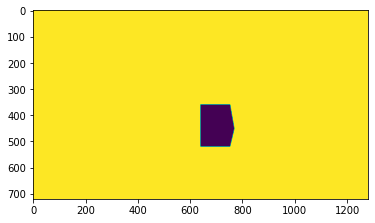

In [95]:
# Create meshes and convert to open3d.t.geometry.TriangleMesh
cube = o3d.geometry.TriangleMesh.create_box().translate([0, 0, 0])
print(type(cube))
cube = o3d.t.geometry.TriangleMesh.from_legacy(cube)
print(type(cube))
# torus = o3d.geometry.TriangleMesh.create_torus().translate([0, 0, 2])
# torus = o3d.t.geometry.TriangleMesh.from_legacy(torus)
# sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.5).translate(
#     [1, 2, 3])
# sphere = o3d.t.geometry.TriangleMesh.from_legacy(sphere)
# mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
print(type(scene))
print(scene)
scene.add_triangles(cube)

# scene.add_triangles(torus)
# _ = scene.add_triangles(sphere)


rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, 0, 0],
    eye=[4, -4, 0],
    up=[0, 1, 0],
    width_px=1280,
    height_px=720,
)


# We can directly pass the rays tensor to the cast_rays function.
ans = scene.cast_rays(rays)
# print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
# df = pd.DataFrame(ans['primitive_ids'].numpy())
# df.to_csv('./test.csv')
plt.imshow(ans['primitive_ids'].numpy())

